In [5]:
import pyodbc
print("pyodbc importado")

pyodbc importado


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
dados_conexao = (
    "Driver={SQL Server};"
    "Server=DESKTOP-9AN5OHT;"
    "Database=Portifólio Linkedin;"
)

Conexao = pyodbc.connect(dados_conexao)
print("Conexão bem sucedida")

Conexão bem sucedida


In [8]:
query = """
SELECT *
FROM dbo.vw_logistica_pedidos
"""

df = pd.read_sql(query, Conexao)

C:\Users\tiago\AppData\Local\Temp\ipykernel_18388\1767942348.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, Conexao)


In [9]:
df.head()
df.shape
df.columns

Index(['order_uuid', 'grupo_comercial', 'modal_entrega',
       'tempo_empacotamento_min', 'tempo_separacao_min',
       'tempo_espera_driver_min', 'tempo_total_entrega_min',
       'status_sla_separacao', 'status_sla_entrega', 'status_sla_geral'],
      dtype='object')

In [10]:
df.isnull().mean().sort_values(ascending=False)

tempo_empacotamento_min    0.599345
tempo_separacao_min        0.257860
grupo_comercial            0.000000
order_uuid                 0.000000
modal_entrega              0.000000
tempo_espera_driver_min    0.000000
tempo_total_entrega_min    0.000000
status_sla_separacao       0.000000
status_sla_entrega         0.000000
status_sla_geral           0.000000
dtype: float64

In [11]:
df = pd.read_sql("SELECT * FROM vw_logistica_pedidos", Conexao)
df.columns

C:\Users\tiago\AppData\Local\Temp\ipykernel_18388\1410469751.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM vw_logistica_pedidos", Conexao)


Index(['order_uuid', 'grupo_comercial', 'modal_entrega',
       'tempo_empacotamento_min', 'tempo_separacao_min',
       'tempo_espera_driver_min', 'tempo_total_entrega_min',
       'status_sla_separacao', 'status_sla_entrega', 'status_sla_geral'],
      dtype='object')

In [12]:
df = pd.read_sql("SELECT * FROM vw_qualidade_dados", Conexao)
df.columns

C:\Users\tiago\AppData\Local\Temp\ipykernel_18388\1644764346.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM vw_qualidade_dados", Conexao)


Index(['total_registros', 'registros_com_valor', 'registros_null'], dtype='object')

In [33]:
sla_entrega_pct = (
    df['status_sla_entrega']
    .value_counts(normalize=True)
    .get('No Prazo', 0) * 100
)

sla_entrega_pct


np.float64(80.06550218340611)

In [34]:
df[['tempo_separacao_min',
    'tempo_espera_driver_min',
    'tempo_total_entrega_min']].mean()

tempo_separacao_min         90.787585
tempo_espera_driver_min     10.502402
tempo_total_entrega_min    347.806769
dtype: float64

In [35]:
df.groupby('status_sla_entrega')[[
    'tempo_separacao_min',
    'tempo_espera_driver_min',
    'tempo_total_entrega_min'
]].mean()

,tempo_separacao_min,tempo_espera_driver_min,tempo_total_entrega_min
status_sla_entrega,,,
Atrasado,95.016566,21.812705,363.296824
No Prazo,89.760878,7.686392,343.950095


In [36]:
df.groupby('modal_entrega')['tempo_total_entrega_min'].mean().sort_values()

modal_entrega
BIKE           189.290598
MOTORCYCLE     218.719757
MOTO_BAU       286.380769
CAR            554.467062
VUC            712.000000
FIORINO       1065.600000
Name: tempo_total_entrega_min, dtype: float64

In [37]:
df.groupby('grupo_comercial')['tempo_total_entrega_min'].mean().sort_values(ascending=False)


grupo_comercial
MegaComprasAtacados    639.083333
Atacadista Nacional    492.918367
Rede Economia          426.958333
Rede Global Atacado    317.534915
Grupo Mercado Prime    290.631000
Name: tempo_total_entrega_min, dtype: float64

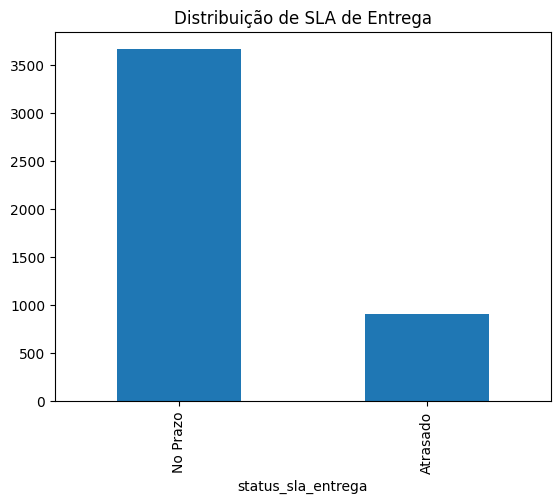

In [38]:
df['status_sla_entrega'].value_counts().plot(kind='bar')
plt.title('Distribuição de SLA de Entrega')
plt.show()